In [35]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [36]:
from keras.datasets import cifar10
(x_train_rgb,y_train),(x_test_rgb,y_test)=cifar10.load_data()

In [37]:
fashion_mnist_labels=["airplane",
                      "automobile",
                      "bird",
                      "cat",
                      "deer",
                      "dog",
                      "frog",
                      "horse",
                      "ship",
                      "truck"]

In [38]:
def rgb_to_gray(img):
  R, G, B = img[:,:,:,0], img[:,:,:,1], img[:,:,:,2]
  imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
  return imgGray

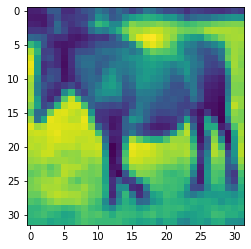

In [39]:
x_train_gray =rgb_to_gray(x_train_rgb)
x_test_gray = rgb_to_gray(x_test_rgb)

plt.imshow(x_train_gray[7])
x_train_gray.shape
x_test_gray = x_test_gray.astype('float32')/255
x_train_gray = x_train_gray.astype('float32')/255

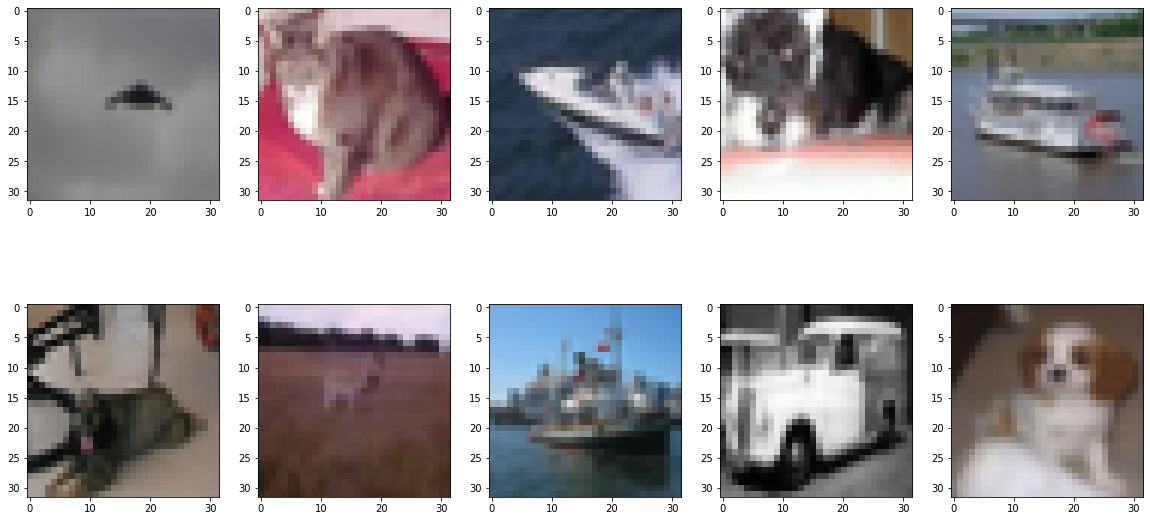

In [40]:
figure = plt.figure(figsize=(20, 10))
for i in range(10):
  photo= np.random.choice(x_train_rgb.shape[0], size=15, replace=False)
  ax = figure.add_subplot(2, 5, i+1)
  ax.imshow(np.squeeze(x_train_rgb[photo[i]]))

(50000, 32, 32)
[0.9999     0.9920576  0.9920576  ... 0.3242008  0.32537293 0.32929412]
(50000, 1024)


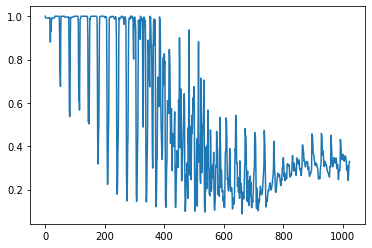

In [41]:
print(x_train_gray.shape)
x_train = x_train_gray.reshape(x_train_gray.shape[0],32*32)
x_test = x_test_gray.reshape(x_test_gray.shape[0],32*32)
print(x_train[2])
print(x_train.shape)
plt.plot(x_train[2])

In [42]:
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)
y_train[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [43]:
from tensorflow.keras import Sequential, layers, losses
model1 = Sequential([
    layers.Input(shape=(32*32)),
    layers.Dense(32,activation='sigmoid'),
    layers.Dense(32,activation='sigmoid'),
    layers.Dense(32,activation='sigmoid'),
    #layers.Dense(10,activation='sigmoid'),
    #layers.Dense(3,activation='sigmoid'),
    layers.Dense(10,activation='softmax')                    
])
model1.compile(
    optimizer='adam',
    loss='BinaryCrossentropy',
    metrics=['accuracy']
    #metrics=['mae','accuracy'] 
)
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                32800     
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dense_11 (Dense)            (None, 32)                1056      
                                                                 
 dense_12 (Dense)            (None, 10)                330       
                                                                 
Total params: 35,242
Trainable params: 35,242
Non-trainable params: 0
_________________________________________________________________


In [44]:
import datetime as dt
t0_relu = dt.datetime.now()
train_model1 = model1.fit(x_train,y_train,epochs=100, validation_split=0.2,batch_size=128)
t1_relu = dt.datetime.now()
print(t1_relu-t0_relu)

Epoch 1/100
313/313 [==============================] - 2s 4ms/step - loss: 0.3860 - accuracy: 0.1006 - val_loss: 0.3251 - val_accuracy: 0.0977
Epoch 2/100
313/313 [==============================] - 1s 4ms/step - loss: 0.3250 - accuracy: 0.1073 - val_loss: 0.3249 - val_accuracy: 0.0980
Epoch 3/100
313/313 [==============================] - 1s 3ms/step - loss: 0.3239 - accuracy: 0.1330 - val_loss: 0.3218 - val_accuracy: 0.0928
Epoch 4/100
313/313 [==============================] - 1s 3ms/step - loss: 0.3174 - accuracy: 0.1550 - val_loss: 0.3132 - val_accuracy: 0.1568
Epoch 5/100
313/313 [==============================] - 1s 3ms/step - loss: 0.3108 - accuracy: 0.1669 - val_loss: 0.3090 - val_accuracy: 0.1716
Epoch 6/100
313/313 [==============================] - 1s 3ms/step - loss: 0.3074 - accuracy: 0.1880 - val_loss: 0.3057 - val_accuracy: 0.2016
Epoch 7/100
313/313 [==============================] - 1s 3ms/step - loss: 0.3039 - accuracy: 0.2049 - val_loss: 0.3020 - val_accuracy: 0.2078

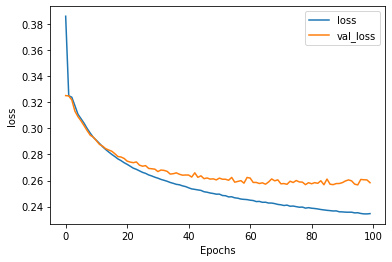

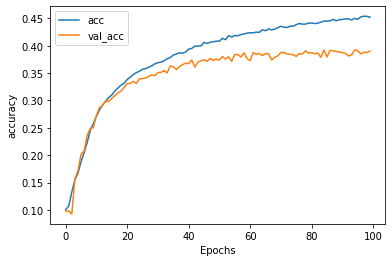

In [45]:
history = train_model1.history
loss = history['loss']
val_loss = history['val_loss']
acc = history['accuracy']
val_acc = history['val_accuracy']
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['acc','val_acc'])

In [48]:
test_loss,test_accuracy = model1.evaluate(x_test,y_test)
print(test_loss)
print(test_accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.2595 - accuracy: 0.3830
0.25953209400177
0.382999986410141


[0.41291811 0.48723404 0.31619537 0.30128205 0.29814385 0.39130435
 0.28767123 0.48190045 0.45992714 0.45658537]
[0.358 0.458 0.246 0.188 0.257 0.315 0.609 0.426 0.505 0.468]
[0.38350295 0.47216495 0.27671541 0.23152709 0.27604726 0.34903047
 0.39076035 0.4522293  0.48141087 0.46222222]
[1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


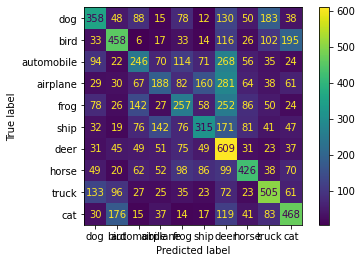

In [49]:
y_pred1 = model1.predict(x_test)
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
y1=[]
p1=[]

for k in range(len(y_test)):
  y1 +=[np.argmax(y_test[k])]
  p1 +=[np.argmax(y_pred1[k])]
#print(y1)
#print(p1)
met = precision_recall_fscore_support(y1, p1)
for m in range(4):
  print(met[m])

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y1, p1),
                              display_labels={"airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"} )
disp.plot()

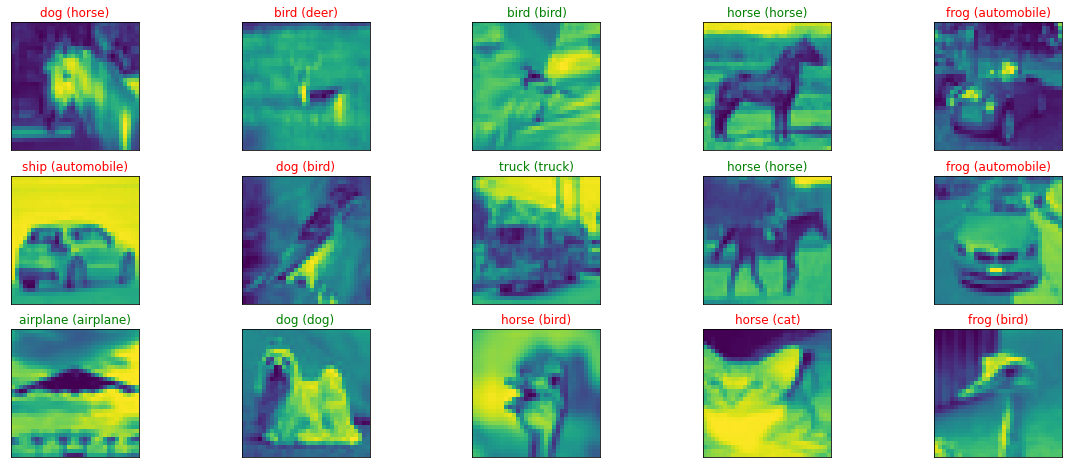

In [50]:
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test_rgb.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test_gray[index]))
    predict_index = np.argmax(y_pred1[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [51]:
print(t1_relu-t0_relu)

0:01:47.448594
